In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df_train=pd.read_csv('train.csv')

%matplotlib inline
sns.set()

In [95]:
df_train.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age

In [97]:
age=df_train['Age']
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

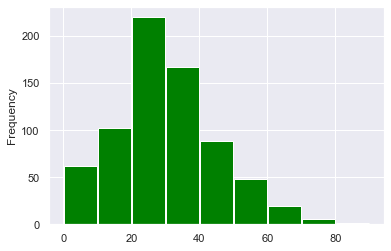

In [98]:
bins=np.arange(0,100,10)
age.plot.hist(bins=bins, rwidth=0.95, color="green")

Fare

In [99]:
fare=df_train['Fare']
fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

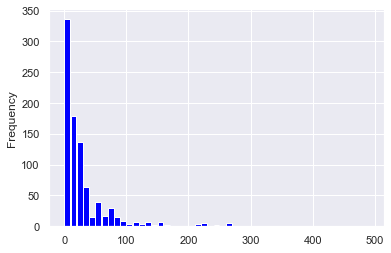

In [100]:
bins=np.arange(0,500,10)
fare.plot.hist(bins=bins, rwidth=0.95, color="blue")

In [102]:
k=100
count=0
for i in fare:
     if i>k:
         count=count+1
print("Fares greater than 100:"+ str(count))

Fares greater than 100:53


In [103]:
k=100
count=0
for i in fare:
    if i<k:
        count=count+1
print("Fares less than 100:"+ str(count))

Fares less than 100:838


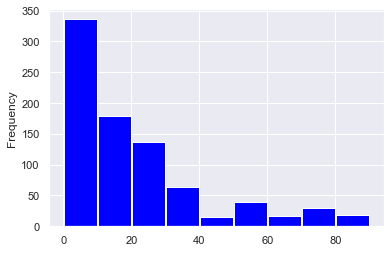

In [104]:
bins=np.arange(0,100,10)
fare.plot.hist(bins=bins, rwidth=0.95, color="blue")

In [105]:
df_by_surv = df_train.groupby('Survived')
type(df_by_surv)
df_by_surv.describe()

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                Pclass            ... Parch        Fare                        \
            max  count      mean  ...   75%  max  count       mean        std   
Survived                          ...                                           
0         891.0  549.0  2.531876  ...   0.0  6.0  549.0  22.117887  31.388207   
1         890.0  342.0  1.950292  ...   1.0  5.0  342.0  48.395408  66.596998   

                                              
          min      25%   50%   75%       max  
Survived                                      
0         0.0   7.8542  10.5  26.0  263.0000  
1         0.0  12.4750  26.0  57.0  512.3292  

[2 rows x 48 columns]

In [106]:
df_by_surv_fare=df_by_surv['Fare']

In [107]:
df_by_surv_fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

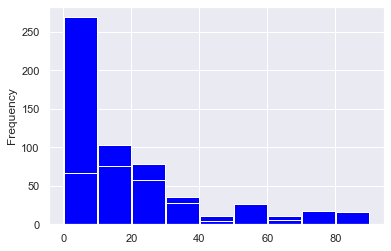

In [108]:
bins=np.arange(0,100,10)
df_by_surv_fare.plot.hist(bins=bins, rwidth=0.95, color="blue")

In [109]:
Nosurv=df_train[df_train.Survived==0]
Surv=df_train[df_train.Survived==1]

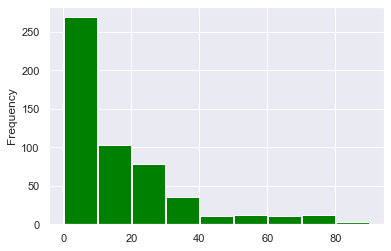

In [110]:
bins=np.arange(0,100,10)
Nosurv.Fare.plot.hist(bins=bins, rwidth=0.95, color="green")

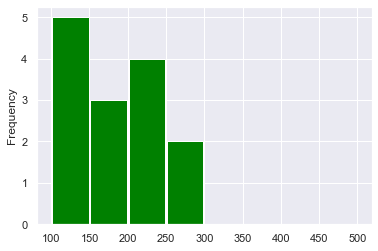

In [111]:
bins=np.arange(100,520,50)
Nosurv.Fare.plot.hist(bins=bins, rwidth=0.95, color="green")

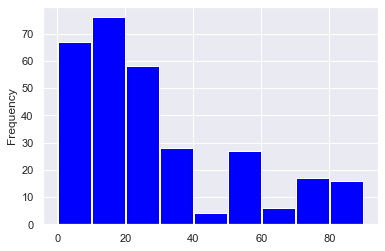

In [112]:
bins=np.arange(0,100,10)
Surv.Fare.plot.hist(bins=bins, rwidth=0.95, color="blue")

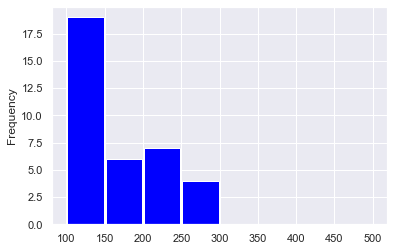

In [92]:
bins=np.arange(100,520,50)
Surv.Fare.plot.hist(bins=bins, rwidth=0.95, color="blue")

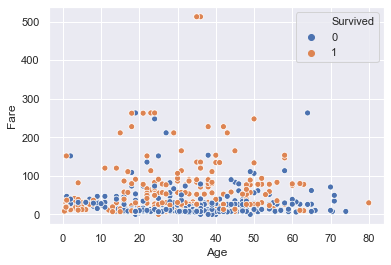

In [113]:
sns.scatterplot(x=df_train['Age'], y=df_train['Fare'], hue=df_train['Survived'],data=df_train)